# Multiple Linear Regression

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

import statsmodels.api as sm
from statsmodels.formula.api import ols

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
#pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Load the data

In [2]:
df = pd.read_csv('games_df.csv')

del df["Unnamed: 0"]
df.head(10)

,Rank,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Global_Sales,NA_Sales,PAL_Sales,...,months_ago,Company,generation_lifespan,generation_flag,Publisher_Metascore,Publisher_Userscore,Developer_Metascore,Developer_Userscore,Genre_Metascore,Genre_Userscore
0,20,Grand Theft Auto V,Action,M,PS3,Rockstar Games,Others,20.32,6.37,9.85,...,79,Sony,0.975904,0.0,82.900000,7.860000,69.102153,7.097440,66.628349,7.088764
1,21,Grand Theft Auto V,Action,M,PS4,Rockstar Games,Others,19.39,6.06,9.71,...,65,Sony,0.142857,0.0,82.900000,7.860000,69.102153,7.097440,66.628349,7.088764
2,31,Grand Theft Auto: Vice City,Action,M,PS2,Rockstar Games,Others,16.15,8.41,5.49,...,210,Sony,0.375000,0.0,82.900000,7.860000,69.102153,7.097440,66.628349,7.088764
3,33,Grand Theft Auto V,Action,M,X360,Rockstar Games,Others,15.86,9.06,5.33,...,79,Microsoft,0.978947,0.0,82.900000,7.860000,69.102153,7.097440,66.628349,7.088764
4,41,Call of Duty: Modern Warfare 3,Shooter,M,X360,Activision,Infinity Ward,14.82,9.07,4.29,...,101,Microsoft,0.747368,0.0,70.563107,6.830097,82.863636,5.077273,70.479064,6.974507
5,42,Call of Duty: Black Ops,Shooter,M,X360,Activision,Treyarch,14.74,9.76,3.73,...,113,Microsoft,0.621053,0.0,70.563107,6.830097,76.789474,7.107895,70.479064,6.974507
6,46,Red Dead Redemption 2,Action-Adventure,M,PS4,Rockstar Games,Others,13.94,5.26,6.21,...,18,Sony,0.702381,0.0,82.900000,7.860000,69.102153,7.097440,73.584071,6.911504
7,47,Call of Duty: Black Ops II,Shooter,M,X360,Activision,Treyarch,13.86,8.27,4.32,...,89,Microsoft,0.873684,0.0,70.563107,6.830097,76.789474,7.107895,70.479064,6.974507
8,48,Call of Duty: Black Ops II,Shooter,M,PS3,Activision,Treyarch,13.80,4.99,5.88,...,89,Sony,0.855422,0.0,70.563107,6.830097,76.789474,7.107895,70.479064,6.974507
9,50,Call of Duty: Modern Warfare 2,Shooter,M,X360,Activision,Infinity Ward,13.53,8.54,3.63,...,125,Microsoft,0.494737,0.0,70.563107,6.830097,82.863636,5.077273,70.479064,6.974507


In [3]:
df.describe()

,Rank,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,metascore,userscore,years_ago,month_num,months_ago,generation_lifespan,generation_flag,Publisher_Metascore,Publisher_Userscore,Developer_Metascore,Developer_Userscore,Genre_Metascore,Genre_Userscore
count,6242.000000,6242.000000,5824.000000,5699.000000,1929.000000,6141.000000,6242.000000,6242.000000,6242.000000,6242.000000,6242.000000,6242.000000,6242.000000,6242.000000,6242.000000,6242.000000,6242.000000,6242.000000,6242.000000,6242.000000
mean,7960.043896,0.642241,0.358480,0.223746,0.102234,0.072872,2008.035405,70.595002,7.135421,11.971804,7.332906,140.328741,0.516602,0.132650,70.595002,7.135421,70.595002,7.135421,70.595002,7.135421
std,5214.566423,1.223215,0.643239,0.525887,0.162095,0.174725,4.676991,13.100307,1.381198,4.663883,3.302275,55.695882,0.277226,0.339223,4.151322,0.326779,4.076497,0.249686,2.794023,0.150820
min,20.000000,0.010000,0.000000,0.000000,0.000000,0.000000,1996.000000,17.000000,0.400000,2.000000,1.000000,18.000000,0.000000,0.000000,59.920000,6.204167,57.185185,5.077273,66.628349,6.911504
25%,3501.500000,0.110000,0.070000,0.020000,0.020000,0.010000,2004.000000,63.000000,6.500000,9.000000,4.000000,106.000000,0.312500,0.000000,67.160000,6.876464,69.102153,7.097440,68.475410,7.045746
50%,7200.000000,0.270000,0.160000,0.070000,0.050000,0.020000,2008.000000,73.000000,7.500000,12.000000,8.000000,147.000000,0.516602,0.000000,70.222222,7.060317,69.102153,7.097440,70.479064,7.088764
75%,12018.500000,0.670000,0.370000,0.210000,0.120000,0.070000,2011.000000,80.000000,8.100000,16.000000,10.000000,185.000000,0.686747,0.000000,73.655773,7.321359,69.102153,7.097440,72.519939,7.250746
max,19859.000000,20.320000,9.760000,9.850000,2.170000,3.120000,2020.000000,98.000000,9.400000,24.000000,12.000000,289.000000,1.590909,1.000000,82.900000,8.064000,84.838710,8.104545,75.491713,7.450460


In [4]:
df.shape

(6242, 29)

In [5]:
df.columns

Index(['Rank', 'Name', 'Genre', 'ESRB_Rating', 'Platform', 'Publisher',
       'Developer', 'Global_Sales', 'NA_Sales', 'PAL_Sales', 'JP_Sales',
       'Other_Sales', 'Year', 'metascore', 'userscore', 'date', 'years_ago',
       'month_abbrev', 'month_num', 'months_ago', 'Company',
       'generation_lifespan', 'generation_flag', 'Publisher_Metascore',
       'Publisher_Userscore', 'Developer_Metascore', 'Developer_Userscore',
       'Genre_Metascore', 'Genre_Userscore'],
      dtype='object')

## Manage Categorical Variables

In [6]:
categorical = df[['Genre','ESRB_Rating','Company','Publisher']]

In [7]:
categorical_df = pd.get_dummies(data=categorical, drop_first=True)

In [8]:
categorical_df.describe()

,Genre_Action-Adventure,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Others,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,...,Publisher_SouthPeak Interactive,Publisher_Square Enix,Publisher_THQ,Publisher_Tecmo,Publisher_Tecmo Koei,Publisher_Ubisoft,Publisher_VU Games,Publisher_Warner Bros. Interactive,Publisher_Warner Bros. Interactive Entertainment,Publisher_Xseed Games
count,6242.000000,6242.000000,6242.000000,6242.000000,6242.000000,6242.000000,6242.000000,6242.000000,6242.000000,6242.000000,...,6242.000000,6242.000000,6242.000000,6242.000000,6242.000000,6242.000000,6242.000000,6242.000000,6242.000000,6242.000000
mean,0.018103,0.059276,0.053669,0.048863,0.011375,0.059596,0.021147,0.078500,0.104454,0.130087,...,0.004005,0.016661,0.038930,0.004326,0.010093,0.062961,0.008491,0.009933,0.007850,0.007369
std,0.133335,0.236159,0.225381,0.215598,0.106052,0.236756,0.143886,0.268979,0.305873,0.336426,...,0.063164,0.128009,0.193443,0.065632,0.099963,0.242912,0.091761,0.099175,0.088259,0.085535
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Declare the dependent and independent variables

In [9]:
df.columns

Index(['Rank', 'Name', 'Genre', 'ESRB_Rating', 'Platform', 'Publisher',
       'Developer', 'Global_Sales', 'NA_Sales', 'PAL_Sales', 'JP_Sales',
       'Other_Sales', 'Year', 'metascore', 'userscore', 'date', 'years_ago',
       'month_abbrev', 'month_num', 'months_ago', 'Company',
       'generation_lifespan', 'generation_flag', 'Publisher_Metascore',
       'Publisher_Userscore', 'Developer_Metascore', 'Developer_Userscore',
       'Genre_Metascore', 'Genre_Userscore'],
      dtype='object')

In [10]:
target = df['Global_Sales']
features = df[['metascore', 'userscore', 'years_ago', 'generation_lifespan', 'generation_flag']]
categorical = df[['Genre','ESRB_Rating','Company','Publisher']]
categorical_df = pd.get_dummies(data=categorical, drop_first=True)
#features = pd.concat([features, categorical], axis=1)

## Standardization / Scaling and Comparing Weights

In [11]:
scaler = StandardScaler()

In [12]:
features_scaled = []
for var in features:
    new_col = var +"_scaled"
    df[new_col] = scaler.fit_transform(df[[var]])
    features_scaled.append(new_col)

In [13]:
features_scaled

['metascore_scaled',
 'userscore_scaled',
 'years_ago_scaled',
 'generation_lifespan_scaled',
 'generation_flag_scaled']

In [14]:
categorical = df[['Genre','ESRB_Rating','Company','Publisher']]
categorical_df = pd.get_dummies(data=categorical, drop_first=True)

In [15]:
fit = ols('Global_Sales ~ metascore_scaled + userscore_scaled + years_ago_scaled + generation_lifespan_scaled + generation_flag_scaled + C(Genre) + C(ESRB_Rating) + C(Company) + C(Publisher)', data=df).fit() 
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     27.79
Date:                Thu, 26 Mar 2020   Prob (F-statistic):          5.75e-320
Time:                        09:13:06   Log-Likelihood:                -9226.6
No. Observations:                6242   AIC:                         1.860e+04
Df Residuals:                    6168   BIC:                         1.910e+04
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
Intercept                                                  0.5108      0.138      3.709      0.000       0.241       0.781
C(Genre)[T.Action-Adventure]                               0.0191      0.110      0.173      0.862      -0.197       0.235
C(Genre)[T.Adventure]                                     -0.1771      0.065     -2.709      0.007      -0.305      -0.049
C(Genre)[T.Fighting]                                       0.0056      0.071      0.079      0.937      -0.133       0.144
C(Genre)[T.Misc]                                           0.0045      0.072      0.063      0.950      -0.137       0.146
C(Genre)[T.Others]                                        -0.2522      0.135     -1.866      0.062      -0.517       0.013
C(Genre)[T.Platform]                                      -0.0914      0.069     -1.317      0.188      -0.228       0.045
C(Genre)[T.Puzzle]                                        -0.3085      0.105     -2.937      0.003      -0.514      -0.103
C(Genre)[T.Racing]                                        -0.1464      0.065     -2.236      0.025      -0.275      -0.018
C(Genre)[T.Role-Playing]                                  -0.0723      0.058     -1.243      0.214      -0.186       0.042
C(Genre)[T.Shooter]                                        0.0573      0.052      1.108      0.268      -0.044       0.159
C(Genre)[T.Simulation]                                     0.0208      0.077      0.270      0.787      -0.130       0.172
C(Genre)[T.Sports]                                        -0.1840      0.067     -2.766      0.006      -0.314      -0.054
C(Genre)[T.Strategy]                                      -0.1923      0.078     -2.471      0.013      -0.345      -0.040
C(ESRB_Rating)[T.E10]                                     -0.1632      0.051     -3.184      0.001      -0.264      -0.063
C(ESRB_Rating)[T.M]                                        0.1643      0.056      2.935      0.003       0.055       0.274
C(ESRB_Rating)[T.RP]                                      -0.3091      0.314     -0.985      0.325      -0.924       0.306
C(ESRB_Rating)[T.T]                                       -0.1158      0.045     -2.574      0.010      -0.204      -0.028
C(Company)[T.Nintendo]                                     0.0455      0.044      1.031      0.303      -0.041       0.132
C(Company)[T.PC]                                          -0.3538      0.091     -3.883      0.000      -0.532      -0.175
C(Company)[T.Sega]                                        -0.1567      0.325     -0.482      0.630      -0.794       0.480
C(Company)[T.Sony]                                         0.2784      0.037      7.608      0.000       0.207       0.350
C(Publis

In [16]:
target = df['Global_Sales']
features = df[['metascore', 'userscore','years_ago', 'generation_lifespan', 'generation_flag', 'Publisher_Metascore', 'Publisher_Userscore', 'Developer_Metascore', 'Developer_Userscore', 'Genre_Metascore', 'Genre_Userscore']]
# categorical = df[['Genre','ESRB_Rating','Company','Publisher']]
# categorical = pd.get_dummies(data=categorical, drop_first=True)
# features = pd.concat([features, categorical], axis=1)
lasso = Lasso(alpha = 0.05).fit(features,target)
lasso.coef_

array([ 0.03065178, -0.09757957, -0.00760187, -0.        , -0.1270537 ,
        0.04153871, -0.        ,  0.01198806, -0.        , -0.035636  ,
       -0.        ])

## Functions for reuse

In [17]:
def run_regression(target, features, degree):
    
    '''
    This function automatically runs a multiple regression test based on the
    inputted target and features. This automatically splits train and test 
    data. The function also automatically does polynomial regression based
    on degree inputted. This function can output the following values based 
    on the test:
    
    - Coefficients and Intercept values
    - P values
    - R2 score for test and train data
    - Adjusted R2 score for test and train data
    - Different error metrics: MAE, MSE and RMSE
    - Cross-validation score
    
    Parameters: 
        Target: The dependent variable that the user wishes to predict
        Features: The independent variables to be used to predict target
          
    Returns: 
        This returns a dictionary of the values discussed above
    
    '''
    if degree > 0:

    
        ### Train, Test Split of all observations ###
        X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=42,test_size=0.2)


        ### Polynomial regression ###
        poly = PolynomialFeatures(degree=degree)
        X_train = poly.fit_transform(X_train)
        X_test = poly.fit_transform(X_test)

        ### Run linear regression on the training data ###
        reg = LinearRegression()
        reg.fit(X_train,y_train)
        coef_train = reg.coef_
        intercept_train = reg.intercept_
        p_values = f_regression(X_train,y_train)[1]

        ### Get r2 and adjusted r2 score of training ###
        r2_train = reg.score(X_train, y_train)

        n = X_train.shape[0]
        p = X_train.shape[1]
        adjusted_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)

        ### Get error values for training ###
        y_train_pred = reg.predict(X_train)

        train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
        train_mse = metrics.mean_squared_error(y_train, y_train_pred)
        train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

        ### Run linear regression on the testing data ###
        reg.score(X_test, y_test)

        ### Get r2 and adjusted r2 score of testing ###
        r2_test = reg.score(X_test, y_test)
        n = X_test.shape[0]
        p = X_test.shape[1]

        adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)

        ### Get error values for testing ###
        y_test_pred = reg.predict(X_test)

        test_mae = metrics.mean_absolute_error(y_test, y_test_pred)
        test_mse = metrics.mean_squared_error(y_test, y_test_pred)
        test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

        ### Get five-fold cross-validation score ###
        cv = float(format(cross_val_score(reg,features,target,cv=5).mean(),'.3f'))

        return {'coef_train': coef_train, 'intercept_train': intercept_train, 'p_values': p_values, 'r2_train': r2_train, 'adjusted_r2_train': adjusted_r2_train ,'train_rmse': train_rmse, 'r2_test': r2_test, 'adjusted_r2_test': adjusted_r2_test ,'test_rmse': test_rmse, 'cv': cv, 'X_train': X_train, 'X_test': X_test, 'y_train': y_train, 'y_test': y_test, 'y_test_pred': y_test_pred}
    
    else:
        ### Train, Test Split of all observations ###
        X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=42,test_size=0.2)

        ### Run linear regression on the training data ###
        reg = LinearRegression()
        reg.fit(X_train,y_train)
        coef_train = reg.coef_
        intercept_train = reg.intercept_
        p_values = f_regression(X_train,y_train)[1]

        ### Get r2 and adjusted r2 score of training ###
        r2_train = reg.score(X_train, y_train)

        n = X_train.shape[0]
        p = X_train.shape[1]
        adjusted_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)

        ### Get error values for training ###
        y_train_pred = reg.predict(X_train)

        train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
        train_mse = metrics.mean_squared_error(y_train, y_train_pred)
        train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

        ### Run linear regression on the testing data ###
        reg.score(X_test, y_test)

        ### Get r2 and adjusted r2 score of testing ###
        r2_test = reg.score(X_test, y_test)
        n = X_test.shape[0]
        p = X_test.shape[1]

        adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)

        ### Get error values for testing ###
        y_test_pred = reg.predict(X_test)

        test_mae = metrics.mean_absolute_error(y_test, y_test_pred)
        test_mse = metrics.mean_squared_error(y_test, y_test_pred)
        test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

        ### Get five-fold cross-validation score ###
        cv = float(format(cross_val_score(reg,features,target,cv=5).mean(),'.3f'))
        
        return {'coef_train': coef_train, 'intercept_train': intercept_train, 'p_values': p_values, 'r2_train': r2_train, 'adjusted_r2_train': adjusted_r2_train ,'train_rmse': train_rmse, 'r2_test': r2_test, 'adjusted_r2_test': adjusted_r2_test ,'test_rmse': test_rmse, 'cv': cv, 'X_train': X_train, 'X_test': X_test, 'y_train': y_train, 'y_test': y_test, 'y_test_pred': y_test_pred}

## Create summary table

In [18]:
summary_df = pd.DataFrame(columns=['Model', 'Description','Root Mean Squared Error (RMSE)', 'R-squared (training)', 'Adjusted R-squared (training)','R-squared (test)', 'Adjusted R-squared (test)', '5-fold Cross Validation'])
summary_df

,Model,Description,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-fold Cross Validation


## Multiple Linear Regression Models

### Multiple Regression - 1 (all features, dummy data)

#### Set Target and Features

In [19]:
target = df['Global_Sales']
features = df[['metascore', 'userscore', 'years_ago', 'generation_lifespan', 'generation_flag']]
categorical = df[['Genre','ESRB_Rating','Company','Publisher']]
categorical = pd.get_dummies(data=categorical, drop_first=True)
features = pd.concat([features, categorical], axis=1)

#### Run regression

In [20]:
result = run_regression(target, features, 0)

#### Scatter and residual plots

Text(0, 0.5, 'Predictions')

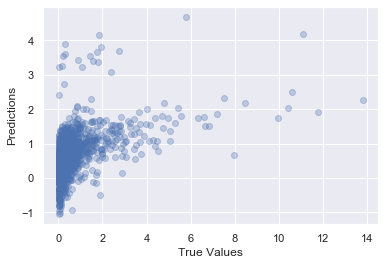

In [21]:
plt.scatter(result['y_test'], result['y_test_pred'], alpha=0.3)

plt.xlabel("True Values")
plt.ylabel("Predictions")

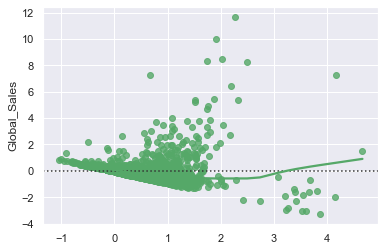

In [22]:
sns.residplot(result['y_test_pred'], result['y_test'], lowess=True, color="g")

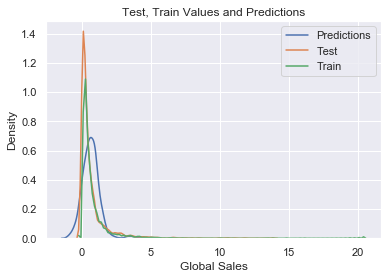

In [23]:
sns.kdeplot(result['y_test_pred'], label = "Predictions")
sns.kdeplot(result['y_test'], label = "Test")
sns.kdeplot(result['y_train'], label = "Train")

plt.xlabel("Global Sales"); plt.ylabel("Density");
plt.title("Test, Train Values and Predictions");

#### Updated summary table of all models

In [24]:
summary_df = summary_df.append({'Model' : 'Model 1', 'Description' : 'All features, dummy data' , 'Root Mean Squared Error (RMSE)' : result['train_rmse'], 'R-squared (training)' : result['r2_train'], 'Adjusted R-squared (training)': result['adjusted_r2_train'], 'R-squared (test)' : result['r2_test'], 'Adjusted R-squared (test)' : result['adjusted_r2_test'], '5-fold Cross Validation' : result['cv']} , ignore_index=True)
summary_df

,Model,Description,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-fold Cross Validation
0,Model 1,"All features, dummy data",1.054068,0.250425,0.2393,0.217533,0.168921,-257.473


### Multiple Regression - 2 (all features, aggregated categorical data)

#### Set Target and Features

In [25]:
target = df['Global_Sales']
features = df[['metascore', 'userscore','years_ago', 'generation_lifespan', 'generation_flag', 'Publisher_Metascore', 'Publisher_Userscore', 'Developer_Metascore', 'Developer_Userscore', 'Genre_Metascore', 'Genre_Userscore']]

#### Run regression

In [26]:
result = run_regression(target, features, 0)

#### Scatter and residual plots

Text(0, 0.5, 'Predictions')

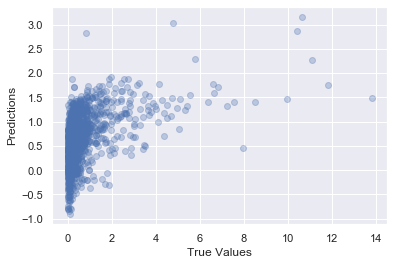

In [27]:
plt.scatter(result['y_test'], result['y_test_pred'], alpha=0.3)

plt.xlabel("True Values")
plt.ylabel("Predictions")

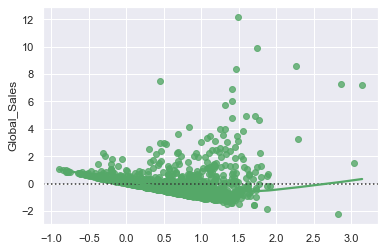

In [28]:
sns.residplot(result['y_test_pred'], result['y_test'], lowess=True, color="g")

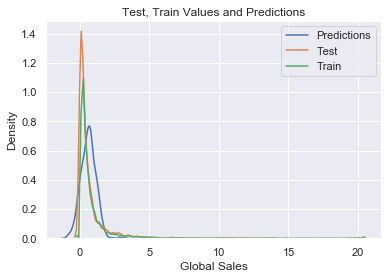

In [29]:
sns.kdeplot(result['y_test_pred'], label = "Predictions")
sns.kdeplot(result['y_test'], label = "Test")
sns.kdeplot(result['y_train'], label = "Train")

plt.xlabel("Global Sales"); plt.ylabel("Density");
plt.title("Test, Train Values and Predictions");

#### Updated summary table of all models

In [30]:
summary_df = summary_df.append({'Model' : 'Model 2', 'Description' : 'All features, aggregated categorical data' , 'Root Mean Squared Error (RMSE)' : result['train_rmse'], 'R-squared (training)' : result['r2_train'], 'Adjusted R-squared (training)': result['adjusted_r2_train'], 'R-squared (test)' : result['r2_test'], 'Adjusted R-squared (test)' : result['adjusted_r2_test'], '5-fold Cross Validation' : result['cv']} , ignore_index=True)
summary_df

,Model,Description,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-fold Cross Validation
0,Model 1,"All features, dummy data",1.054068,0.250425,0.239300,0.217533,0.168921,-257.473
1,Model 2,"All features, aggregated categorical data",1.103406,0.178612,0.176798,0.211767,0.204758,-257.850


### Multiple Regression - 3 (features based on Lasso, aggregated categorical data)

#### Set Target and Features

In [31]:
target = df['Global_Sales']
features = df[['metascore','years_ago', 'generation_lifespan', 'Publisher_Metascore', 'Publisher_Userscore', 'Developer_Metascore', 'Developer_Userscore', 'Genre_Metascore', 'Genre_Userscore']]

#### Run regression

In [32]:
result = run_regression(target, features, 0)

#### Scatter and residual plots

Text(0, 0.5, 'Predictions')

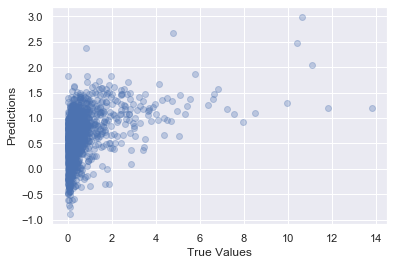

In [33]:
plt.scatter(result['y_test'], result['y_test_pred'], alpha=0.3)

plt.xlabel("True Values")
plt.ylabel("Predictions")

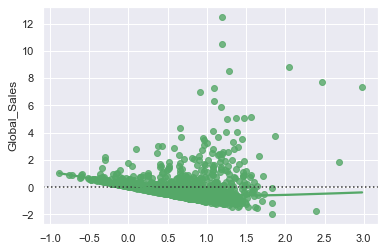

In [34]:
sns.residplot(result['y_test_pred'], result['y_test'], lowess=True, color="g")

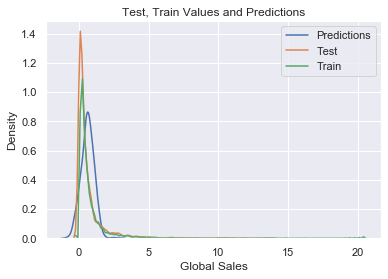

In [35]:
sns.kdeplot(result['y_test_pred'], label = "Predictions")
sns.kdeplot(result['y_test'], label = "Test")
sns.kdeplot(result['y_train'], label = "Train")

plt.xlabel("Global Sales"); plt.ylabel("Density");
plt.title("Test, Train Values and Predictions");

#### Updated summary table of all models

In [36]:
summary_df = summary_df.append({'Model' : 'Model 3', 'Description' : 'Features based on Lasso, aggregated categorical data' , 'Root Mean Squared Error (RMSE)' : result['train_rmse'], 'R-squared (training)' : result['r2_train'], 'Adjusted R-squared (training)': result['adjusted_r2_train'], 'R-squared (test)' : result['r2_test'], 'Adjusted R-squared (test)' : result['adjusted_r2_test'], '5-fold Cross Validation' : result['cv']} , ignore_index=True)
summary_df

,Model,Description,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-fold Cross Validation
0,Model 1,"All features, dummy data",1.054068,0.250425,0.239300,0.217533,0.168921,-257.473
1,Model 2,"All features, aggregated categorical data",1.103406,0.178612,0.176798,0.211767,0.204758,-257.850
2,Model 3,"Features based on Lasso, aggregated categorica...",1.125223,0.145808,0.144266,0.171855,0.165840,-293.291


### Multiple Regression - 4 (all features, dummy data, polynomial 1st degree)

#### Set Target and Features

In [37]:
target = df['Global_Sales']
features = df[['metascore', 'userscore', 'years_ago', 'generation_lifespan', 'generation_flag']]
categorical = df[['Genre','ESRB_Rating','Company','Publisher']]
categorical = pd.get_dummies(data=categorical, drop_first=True)
features = pd.concat([features, categorical], axis=1)

#### Run regression

In [38]:
result = run_regression(target, features, 1)

#### Scatter and residual plots

Text(0, 0.5, 'Predictions')

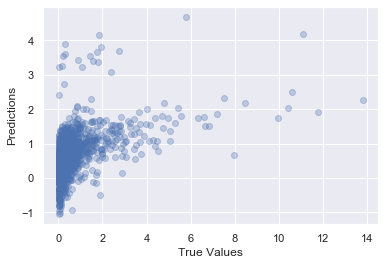

In [39]:
plt.scatter(result['y_test'], result['y_test_pred'], alpha=0.3)

plt.xlabel("True Values")
plt.ylabel("Predictions")

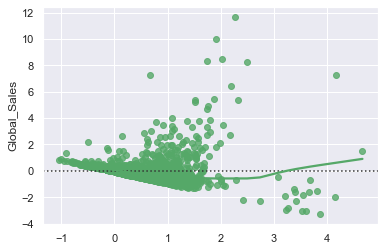

In [40]:
sns.residplot(result['y_test_pred'], result['y_test'], lowess=True, color="g")

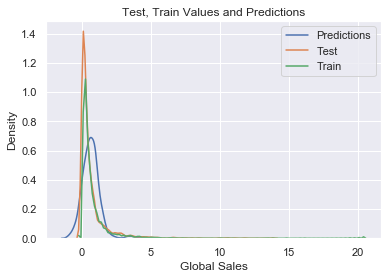

In [41]:
sns.kdeplot(result['y_test_pred'], label = "Predictions")
sns.kdeplot(result['y_test'], label = "Test")
sns.kdeplot(result['y_train'], label = "Train")

plt.xlabel("Global Sales"); plt.ylabel("Density");
plt.title("Test, Train Values and Predictions");

#### Updated summary table of all models

In [42]:
summary_df = summary_df.append({'Model' : 'Model 4', 'Description' : 'All features, dummy data, polynomial 1st degree' , 'Root Mean Squared Error (RMSE)' : result['train_rmse'], 'R-squared (training)' : result['r2_train'], 'Adjusted R-squared (training)': result['adjusted_r2_train'], 'R-squared (test)' : result['r2_test'], 'Adjusted R-squared (test)' : result['adjusted_r2_test'], '5-fold Cross Validation' : result['cv']} , ignore_index=True)
summary_df

,Model,Description,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-fold Cross Validation
0,Model 1,"All features, dummy data",1.054068,0.250425,0.239300,0.217533,0.168921,-257.473
1,Model 2,"All features, aggregated categorical data",1.103406,0.178612,0.176798,0.211767,0.204758,-257.850
2,Model 3,"Features based on Lasso, aggregated categorica...",1.125223,0.145808,0.144266,0.171855,0.165840,-293.291
3,Model 4,"All features, dummy data, polynomial 1st degree",1.054068,0.250425,0.239146,0.217533,0.168213,-257.473


### Multiple Regression - 5 (all features, dummy data, polynomial 2nd degree)

#### Set Target and Features

In [43]:
target = df['Global_Sales']
features = df[['metascore', 'userscore', 'years_ago', 'generation_lifespan', 'generation_flag']]
categorical = df[['Genre','ESRB_Rating','Company','Publisher']]
categorical = pd.get_dummies(data=categorical, drop_first=True)
features = pd.concat([features, categorical], axis=1)

#### Run regression

In [44]:
result = run_regression(target, features, 2)

#### Scatter and residual plots

Text(0, 0.5, 'Predictions')

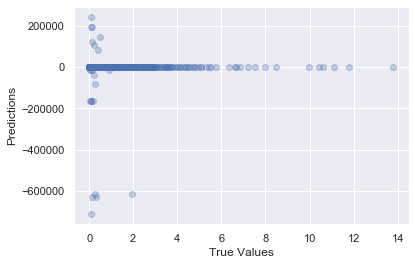

In [45]:
plt.scatter(result['y_test'], result['y_test_pred'], alpha=0.3)

plt.xlabel("True Values")
plt.ylabel("Predictions")

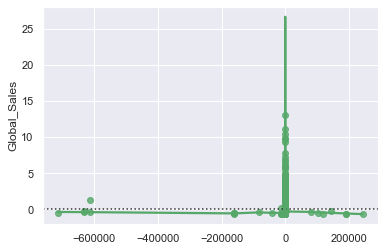

In [46]:
sns.residplot(result['y_test_pred'], result['y_test'], lowess=True, color="g")

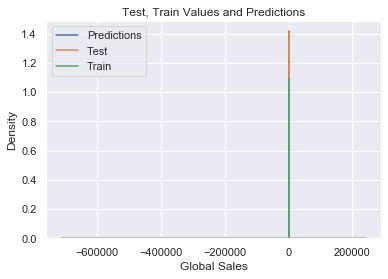

In [47]:
sns.kdeplot(result['y_test_pred'], label = "Predictions")
sns.kdeplot(result['y_test'], label = "Test")
sns.kdeplot(result['y_train'], label = "Train")

plt.xlabel("Global Sales"); plt.ylabel("Density");
plt.title("Test, Train Values and Predictions");

#### Updated summary table of all models

In [48]:
summary_df = summary_df.append({'Model' : 'Model 5', 'Description' : 'All features, dummy data, polynomial 2md degree' , 'Root Mean Squared Error (RMSE)' : result['train_rmse'], 'R-squared (training)' : result['r2_train'], 'Adjusted R-squared (training)': result['adjusted_r2_train'], 'R-squared (test)' : result['r2_test'], 'Adjusted R-squared (test)' : result['adjusted_r2_test'], '5-fold Cross Validation' : result['cv']} , ignore_index=True)
summary_df

,Model,Description,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-fold Cross Validation
0,Model 1,"All features, dummy data",1.054068,0.250425,0.239300,2.175333e-01,1.689205e-01,-257.473
1,Model 2,"All features, aggregated categorical data",1.103406,0.178612,0.176798,2.117670e-01,2.047577e-01,-257.850
2,Model 3,"Features based on Lasso, aggregated categorica...",1.125223,0.145808,0.144266,1.718553e-01,1.658397e-01,-293.291
3,Model 4,"All features, dummy data, polynomial 1st degree",1.054068,0.250425,0.239146,2.175333e-01,1.682126e-01,-257.473
4,Model 5,"All features, dummy data, polynomial 2md degree",0.751828,0.618658,0.141335,-1.217161e+09,9.947719e+08,-257.473


### Multiple Regression - 6 (all features, aggregated categorical data, polynomial 1st degree)

#### Set Target and Features

In [49]:
target = df['Global_Sales']
features = df[['metascore', 'userscore','years_ago', 'generation_lifespan', 'generation_flag', 'Publisher_Metascore', 'Publisher_Userscore', 'Developer_Metascore', 'Developer_Userscore', 'Genre_Metascore', 'Genre_Userscore']]

#### Run regression

In [50]:
result = run_regression(target, features, 1)

#### Scatter and residual plots

Text(0, 0.5, 'Predictions')

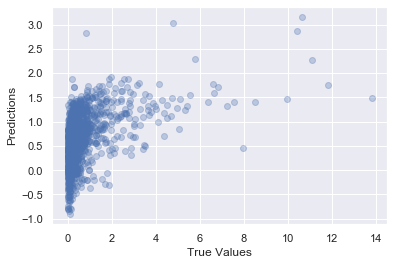

In [51]:
plt.scatter(result['y_test'], result['y_test_pred'], alpha=0.3)

plt.xlabel("True Values")
plt.ylabel("Predictions")

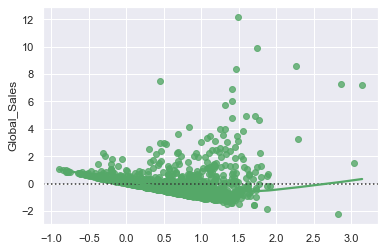

In [52]:
sns.residplot(result['y_test_pred'], result['y_test'], lowess=True, color="g")

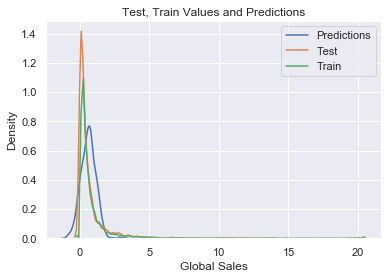

In [53]:
sns.kdeplot(result['y_test_pred'], label = "Predictions")
sns.kdeplot(result['y_test'], label = "Test")
sns.kdeplot(result['y_train'], label = "Train")

plt.xlabel("Global Sales"); plt.ylabel("Density");
plt.title("Test, Train Values and Predictions");

#### Updated summary table of all models

In [54]:
summary_df = summary_df.append({'Model' : 'Model 6', 'Description' : 'All features, aggregated categorical data, polynomial 1st degree' , 'Root Mean Squared Error (RMSE)' : result['train_rmse'], 'R-squared (training)' : result['r2_train'], 'Adjusted R-squared (training)': result['adjusted_r2_train'], 'R-squared (test)' : result['r2_test'], 'Adjusted R-squared (test)' : result['adjusted_r2_test'], '5-fold Cross Validation' : result['cv']} , ignore_index=True)
summary_df

,Model,Description,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-fold Cross Validation
0,Model 1,"All features, dummy data",1.054068,0.250425,0.239300,2.175333e-01,1.689205e-01,-257.473
1,Model 2,"All features, aggregated categorical data",1.103406,0.178612,0.176798,2.117670e-01,2.047577e-01,-257.850
2,Model 3,"Features based on Lasso, aggregated categorica...",1.125223,0.145808,0.144266,1.718553e-01,1.658397e-01,-293.291
3,Model 4,"All features, dummy data, polynomial 1st degree",1.054068,0.250425,0.239146,2.175333e-01,1.682126e-01,-257.473
4,Model 5,"All features, dummy data, polynomial 2md degree",0.751828,0.618658,0.141335,-1.217161e+09,9.947719e+08,-257.473
5,Model 6,"All features, aggregated categorical data, pol...",1.103406,0.178612,0.176632,2.117670e-01,2.041143e-01,-257.850


### Multiple Regression - 7 (all features, aggregated categorical data, polynomial 2nd degree)

#### Set Target and Features

In [55]:
target = df['Global_Sales']
features = df[['metascore', 'userscore','years_ago', 'generation_lifespan', 'generation_flag', 'Publisher_Metascore', 'Publisher_Userscore', 'Developer_Metascore', 'Developer_Userscore', 'Genre_Metascore', 'Genre_Userscore']]

#### Run regression

In [56]:
result = run_regression(target, features, 2)

#### Scatter and residual plots

Text(0, 0.5, 'Predictions')

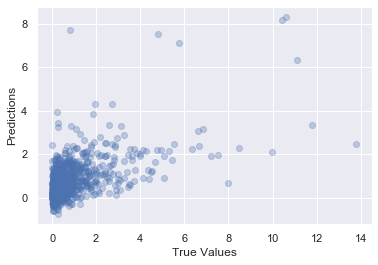

In [57]:
plt.scatter(result['y_test'], result['y_test_pred'], alpha=0.3)

plt.xlabel("True Values")
plt.ylabel("Predictions")

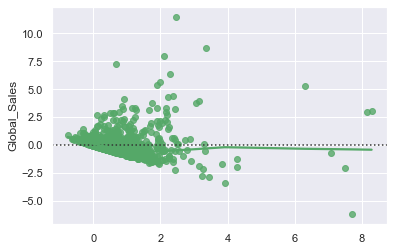

In [58]:
sns.residplot(result['y_test_pred'], result['y_test'], lowess=True, color="g")

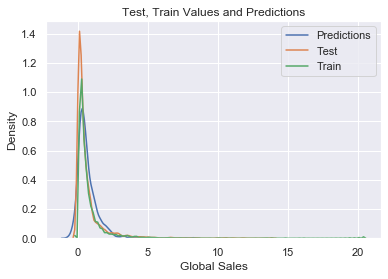

In [59]:
sns.kdeplot(result['y_test_pred'], label = "Predictions")
sns.kdeplot(result['y_test'], label = "Test")
sns.kdeplot(result['y_train'], label = "Train")

plt.xlabel("Global Sales"); plt.ylabel("Density");
plt.title("Test, Train Values and Predictions");

#### Updated summary table of all models

In [60]:
summary_df = summary_df.append({'Model' : 'Model 7', 'Description' : 'All features, aggregated categorical data, polynomial 2md degree' , 'Root Mean Squared Error (RMSE)' : result['train_rmse'], 'R-squared (training)' : result['r2_train'], 'Adjusted R-squared (training)': result['adjusted_r2_train'], 'R-squared (test)' : result['r2_test'], 'Adjusted R-squared (test)' : result['adjusted_r2_test'], '5-fold Cross Validation' : result['cv']} , ignore_index=True)
summary_df

,Model,Description,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-fold Cross Validation
0,Model 1,"All features, dummy data",1.054068,0.250425,0.239300,2.175333e-01,1.689205e-01,-257.473
1,Model 2,"All features, aggregated categorical data",1.103406,0.178612,0.176798,2.117670e-01,2.047577e-01,-257.850
2,Model 3,"Features based on Lasso, aggregated categorica...",1.125223,0.145808,0.144266,1.718553e-01,1.658397e-01,-293.291
3,Model 4,"All features, dummy data, polynomial 1st degree",1.054068,0.250425,0.239146,2.175333e-01,1.682126e-01,-257.473
4,Model 5,"All features, dummy data, polynomial 2md degree",0.751828,0.618658,0.141335,-1.217161e+09,9.947719e+08,-257.473
5,Model 6,"All features, aggregated categorical data, pol...",1.103406,0.178612,0.176632,2.117670e-01,2.041143e-01,-257.850
6,Model 7,"All features, aggregated categorical data, pol...",0.968323,0.367416,0.357375,3.442978e-01,3.005843e-01,-257.850


### Multiple Regression - 8 (basic features, basic aggregated categorical data)

#### Set Target and Features

In [61]:
target = df['Global_Sales']
features = df[['metascore', 'userscore', 'years_ago']]
categorical = df[['Genre','ESRB_Rating','Company']]
categorical = pd.get_dummies(data=categorical, drop_first=True)
features = pd.concat([features, categorical], axis=1)

#### Run regression

In [62]:
result = run_regression(target, features, 0)

#### Scatter and residual plots

Text(0, 0.5, 'Predictions')

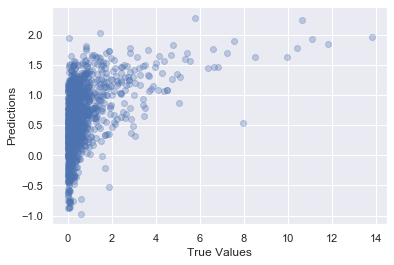

In [63]:
plt.scatter(result['y_test'], result['y_test_pred'], alpha=0.3)

plt.xlabel("True Values")
plt.ylabel("Predictions")

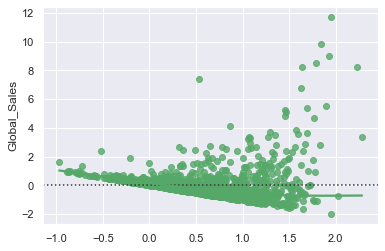

In [64]:
sns.residplot(result['y_test_pred'], result['y_test'], lowess=True, color="g")

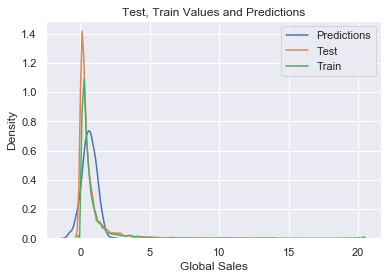

In [65]:
sns.kdeplot(result['y_test_pred'], label = "Predictions")
sns.kdeplot(result['y_test'], label = "Test")
sns.kdeplot(result['y_train'], label = "Train")

plt.xlabel("Global Sales"); plt.ylabel("Density");
plt.title("Test, Train Values and Predictions");

#### Updated summary table of all models

In [66]:
summary_df = summary_df.append({'Model' : 'Model 8', 'Description' : 'Basic features, basic aggregated categorical data' , 'Root Mean Squared Error (RMSE)' : result['train_rmse'], 'R-squared (training)' : result['r2_train'], 'Adjusted R-squared (training)': result['adjusted_r2_train'], 'R-squared (test)' : result['r2_test'], 'Adjusted R-squared (test)' : result['adjusted_r2_test'], '5-fold Cross Validation' : result['cv']} , ignore_index=True)
summary_df

,Model,Description,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-fold Cross Validation
0,Model 1,"All features, dummy data",1.054068,0.250425,0.239300,2.175333e-01,1.689205e-01,-257.473
1,Model 2,"All features, aggregated categorical data",1.103406,0.178612,0.176798,2.117670e-01,2.047577e-01,-257.850
2,Model 3,"Features based on Lasso, aggregated categorica...",1.125223,0.145808,0.144266,1.718553e-01,1.658397e-01,-293.291
3,Model 4,"All features, dummy data, polynomial 1st degree",1.054068,0.250425,0.239146,2.175333e-01,1.682126e-01,-257.473
4,Model 5,"All features, dummy data, polynomial 2md degree",0.751828,0.618658,0.141335,-1.217161e+09,9.947719e+08,-257.473
5,Model 6,"All features, aggregated categorical data, pol...",1.103406,0.178612,0.176632,2.117670e-01,2.041143e-01,-257.850
6,Model 7,"All features, aggregated categorical data, pol...",0.968323,0.367416,0.357375,3.442978e-01,3.005843e-01,-257.850
7,Model 8,"Basic features, basic aggregated categorical data",1.110616,0.167842,0.163822,1.966854e-01,1.809341e-01,-283.440


### Multiple Regression - 9 (metascore and userscore only)

#### Set Target and Features

In [67]:
target = df['Global_Sales']
features = df[['metascore', 'userscore']]
# categorical = df[['Company']]
# categorical = pd.get_dummies(data=categorical, drop_first=True)
# features = pd.concat([features, categorical], axis=1)

#### Run regression

In [68]:
result = run_regression(target, features, 0)

#### Scatter and residual plots

Text(0, 0.5, 'Predictions')

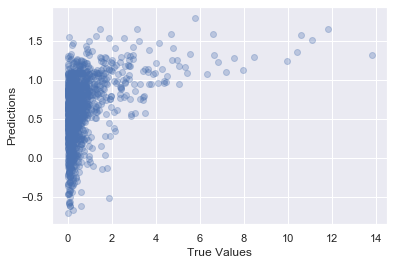

In [69]:
plt.scatter(result['y_test'], result['y_test_pred'], alpha=0.3)

plt.xlabel("True Values")
plt.ylabel("Predictions")

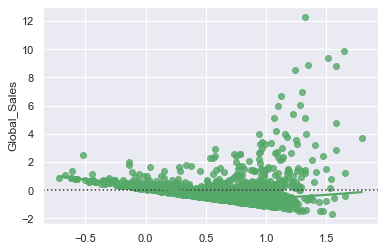

In [70]:
sns.residplot(result['y_test_pred'], result['y_test'], lowess=True, color="g")

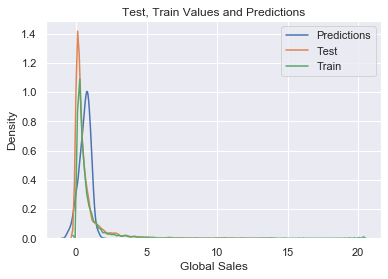

In [71]:
sns.kdeplot(result['y_test_pred'], label = "Predictions")
sns.kdeplot(result['y_test'], label = "Test")
sns.kdeplot(result['y_train'], label = "Train")

plt.xlabel("Global Sales"); plt.ylabel("Density");
plt.title("Test, Train Values and Predictions");

#### Updated summary table of all models

In [72]:
summary_df = summary_df.append({'Model' : 'Model 9', 'Description' : 'metascore and userscore only' , 'Root Mean Squared Error (RMSE)' : result['train_rmse'], 'R-squared (training)' : result['r2_train'], 'Adjusted R-squared (training)': result['adjusted_r2_train'], 'R-squared (test)' : result['r2_test'], 'Adjusted R-squared (test)' : result['adjusted_r2_test'], '5-fold Cross Validation' : result['cv']} , ignore_index=True)
summary_df

,Model,Description,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-fold Cross Validation
0,Model 1,"All features, dummy data",1.054068,0.250425,0.239300,2.175333e-01,1.689205e-01,-257.473
1,Model 2,"All features, aggregated categorical data",1.103406,0.178612,0.176798,2.117670e-01,2.047577e-01,-257.850
2,Model 3,"Features based on Lasso, aggregated categorica...",1.125223,0.145808,0.144266,1.718553e-01,1.658397e-01,-293.291
3,Model 4,"All features, dummy data, polynomial 1st degree",1.054068,0.250425,0.239146,2.175333e-01,1.682126e-01,-257.473
4,Model 5,"All features, dummy data, polynomial 2md degree",0.751828,0.618658,0.141335,-1.217161e+09,9.947719e+08,-257.473
5,Model 6,"All features, aggregated categorical data, pol...",1.103406,0.178612,0.176632,2.117670e-01,2.041143e-01,-257.850
6,Model 7,"All features, aggregated categorical data, pol...",0.968323,0.367416,0.357375,3.442978e-01,3.005843e-01,-257.850
7,Model 8,"Basic features, basic aggregated categorical data",1.110616,0.167842,0.163822,1.966854e-01,1.809341e-01,-283.440
8,Model 9,metascore and userscore only,1.149901,0.107930,0.107573,1.482305e-01,1.468633e-01,-322.082


### Multiple Regression - 10 (basic features, basic aggregated categorical data, polynomial 1st degree)

#### Set Target and Features

In [73]:
target = df['Global_Sales']
features = df[['metascore', 'userscore', 'years_ago']]
categorical = df[['Genre','ESRB_Rating','Company']]
categorical = pd.get_dummies(data=categorical, drop_first=True)
features = pd.concat([features, categorical], axis=1)

#### Run regression

In [74]:
result = run_regression(target, features, 1)

#### Scatter and residual plots

Text(0, 0.5, 'Predictions')

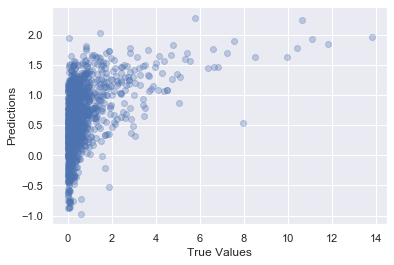

In [75]:
plt.scatter(result['y_test'], result['y_test_pred'], alpha=0.3)

plt.xlabel("True Values")
plt.ylabel("Predictions")

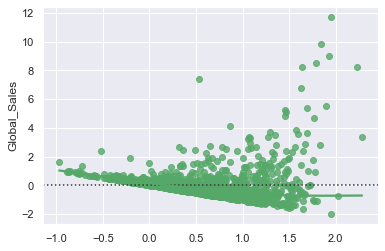

In [76]:
sns.residplot(result['y_test_pred'], result['y_test'], lowess=True, color="g")

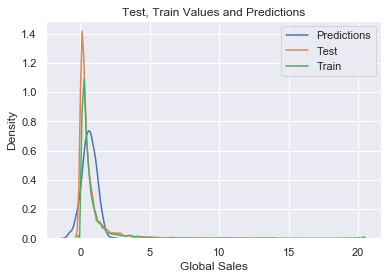

In [77]:
sns.kdeplot(result['y_test_pred'], label = "Predictions")
sns.kdeplot(result['y_test'], label = "Test")
sns.kdeplot(result['y_train'], label = "Train")

plt.xlabel("Global Sales"); plt.ylabel("Density");
plt.title("Test, Train Values and Predictions");

#### Updated summary table of all models

In [78]:
summary_df = summary_df.append({'Model' : 'Model 10', 'Description' : 'Basic features, basic aggregated categorical data, polynomial 1st degree' , 'Root Mean Squared Error (RMSE)' : result['train_rmse'], 'R-squared (training)' : result['r2_train'], 'Adjusted R-squared (training)': result['adjusted_r2_train'], 'R-squared (test)' : result['r2_test'], 'Adjusted R-squared (test)' : result['adjusted_r2_test'], '5-fold Cross Validation' : result['cv']} , ignore_index=True)
summary_df

,Model,Description,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-fold Cross Validation
0,Model 1,"All features, dummy data",1.054068,0.250425,0.239300,2.175333e-01,1.689205e-01,-257.473
1,Model 2,"All features, aggregated categorical data",1.103406,0.178612,0.176798,2.117670e-01,2.047577e-01,-257.850
2,Model 3,"Features based on Lasso, aggregated categorica...",1.125223,0.145808,0.144266,1.718553e-01,1.658397e-01,-293.291
3,Model 4,"All features, dummy data, polynomial 1st degree",1.054068,0.250425,0.239146,2.175333e-01,1.682126e-01,-257.473
4,Model 5,"All features, dummy data, polynomial 2md degree",0.751828,0.618658,0.141335,-1.217161e+09,9.947719e+08,-257.473
5,Model 6,"All features, aggregated categorical data, pol...",1.103406,0.178612,0.176632,2.117670e-01,2.041143e-01,-257.850
6,Model 7,"All features, aggregated categorical data, pol...",0.968323,0.367416,0.357375,3.442978e-01,3.005843e-01,-257.850
7,Model 8,"Basic features, basic aggregated categorical data",1.110616,0.167842,0.163822,1.966854e-01,1.809341e-01,-283.440
8,Model 9,metascore and userscore only,1.149901,0.107930,0.107573,1.482305e-01,1.468633e-01,-322.082
9,Model 10,"Basic features, basic aggregated categorical d...",1.110616,0.167842,0.163654,1.966854e-01,1.802644e-01,-283.440


### Multiple Regression - 10 (basic features, basic aggregated categorical data, polynomial 1st degree)

#### Set Target and Features

In [79]:
target = df['Global_Sales']
features = df[['metascore', 'userscore', 'years_ago']]
categorical = df[['Genre','ESRB_Rating','Company']]
categorical = pd.get_dummies(data=categorical, drop_first=True)
features = pd.concat([features, categorical], axis=1)

#### Run regression

In [80]:
result = run_regression(target, features, 2)

#### Scatter and residual plots

Text(0, 0.5, 'Predictions')

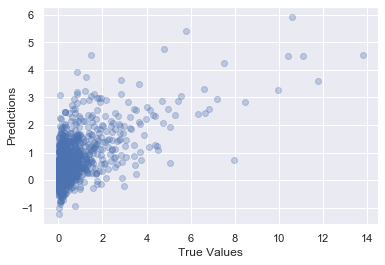

In [81]:
plt.scatter(result['y_test'], result['y_test_pred'], alpha=0.3)

plt.xlabel("True Values")
plt.ylabel("Predictions")

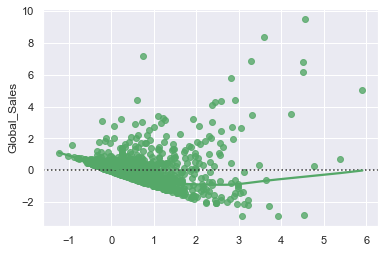

In [82]:
sns.residplot(result['y_test_pred'], result['y_test'], lowess=True, color="g")

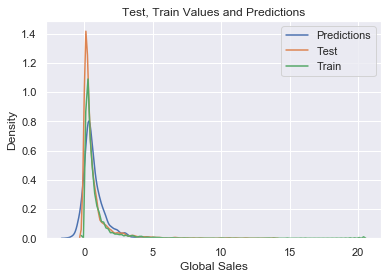

In [83]:
sns.kdeplot(result['y_test_pred'], label = "Predictions")
sns.kdeplot(result['y_test'], label = "Test")
sns.kdeplot(result['y_train'], label = "Train")

plt.xlabel("Global Sales"); plt.ylabel("Density");
plt.title("Test, Train Values and Predictions");

#### Updated summary table of all models

In [84]:
summary_df = summary_df.append({'Model' : 'Model 11', 'Description' : 'Basic features, basic aggregated categorical data, polynomial 2nd degree' , 'Root Mean Squared Error (RMSE)' : result['train_rmse'], 'R-squared (training)' : result['r2_train'], 'Adjusted R-squared (training)': result['adjusted_r2_train'], 'R-squared (test)' : result['r2_test'], 'Adjusted R-squared (test)' : result['adjusted_r2_test'], '5-fold Cross Validation' : result['cv']} , ignore_index=True)
summary_df

,Model,Description,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-fold Cross Validation
0,Model 1,"All features, dummy data",1.054068,0.250425,0.239300,2.175333e-01,1.689205e-01,-257.473
1,Model 2,"All features, aggregated categorical data",1.103406,0.178612,0.176798,2.117670e-01,2.047577e-01,-257.850
2,Model 3,"Features based on Lasso, aggregated categorica...",1.125223,0.145808,0.144266,1.718553e-01,1.658397e-01,-293.291
3,Model 4,"All features, dummy data, polynomial 1st degree",1.054068,0.250425,0.239146,2.175333e-01,1.682126e-01,-257.473
4,Model 5,"All features, dummy data, polynomial 2md degree",0.751828,0.618658,0.141335,-1.217161e+09,9.947719e+08,-257.473
5,Model 6,"All features, aggregated categorical data, pol...",1.103406,0.178612,0.176632,2.117670e-01,2.041143e-01,-257.850
6,Model 7,"All features, aggregated categorical data, pol...",0.968323,0.367416,0.357375,3.442978e-01,3.005843e-01,-257.850
7,Model 8,"Basic features, basic aggregated categorical data",1.110616,0.167842,0.163822,1.966854e-01,1.809341e-01,-283.440
8,Model 9,metascore and userscore only,1.149901,0.107930,0.107573,1.482305e-01,1.468633e-01,-322.082
9,Model 10,"Basic features, basic aggregated categorical d...",1.110616,0.167842,0.163654,1.966854e-01,1.802644e-01,-283.440
